In [1]:
suppressMessages(suppressWarnings(source("config_sing.R")))
print(FD_WORK)
print(FD_RES)

[1] "/home/mount/work"
[1] "/home/mount/work/out/proj_combeffect"


In [2]:
TARGET="target_PER1"
#FDIRY = "marginal_filter00"
FDIRY = "example"

In [3]:
fdiry = file.path(FD_RES, "model_linear", FDIRY, TARGET)
fname = "lm*"
fglob = file.path(fdiry, fname)
fpaths = Sys.glob(fglob)
motifs = sapply(fpaths, function(fpath) {str_remove_all(fpath, pattern = ".*lm_|\\.RDS") })

print(head(motifs))

   /home/mount/work/out/proj_combeffect/model_linear/example/target_PER1/lm_AHR.RDS 
                                                                              "AHR" 
  /home/mount/work/out/proj_combeffect/model_linear/example/target_PER1/lm_AIRE.RDS 
                                                                             "AIRE" 
 /home/mount/work/out/proj_combeffect/model_linear/example/target_PER1/lm_AP1_1.RDS 
                                                                            "AP1_1" 
 /home/mount/work/out/proj_combeffect/model_linear/example/target_PER1/lm_AP1_2.RDS 
                                                                            "AP1_2" 
  /home/mount/work/out/proj_combeffect/model_linear/example/target_PER1/lm_BATF.RDS 
                                                                             "BATF" 
/home/mount/work/out/proj_combeffect/model_linear/example/target_PER1/lm_BCL6_1.RDS 
                                                                 

In [4]:
length(motifs)

[1] 240

In [5]:
lst_dat = lapply(fpaths, function(fpath){
    lst = readRDS(fpath)
    return(lst)
})

names(lst_dat) = motifs

In [6]:
lst_dat[[1]]

$input
$input$cnt
# A tibble: 13 × 7
   Sample    Value     Size Group    Norm_Value Lognorm_Value X       
   <chr>     <dbl>    <dbl> <chr>         <dbl>         <dbl> <fct>   
 1 Input1       44 18666630 Input    0.00000236         -18.7 Input   
 2 Input2       50 20167924 Input    0.00000248         -18.6 Input   
 3 Input3       81 23280988 Input    0.00000348         -18.1 Input   
 4 Input4       53 19003938 Input    0.00000279         -18.5 Input   
 5 Input5       35 15325016 Input    0.00000228         -18.7 Input   
 6 TFX2_Dex    792 45413539 TFX_Dex  0.0000174          -15.8 TFX_Dex 
 7 TFX2_DMSO   386 43844606 TFX_DMSO 0.00000880         -16.8 TFX_DMSO
 8 TFX3_Dex    409 26400671 TFX_Dex  0.0000155          -16.0 TFX_Dex 
 9 TFX3_DMSO   322 26819569 TFX_DMSO 0.0000120          -16.3 TFX_DMSO
10 TFX4_Dex    612 34590086 TFX_Dex  0.0000177          -15.8 TFX_Dex 
11 TFX4_DMSO   302 30951533 TFX_DMSO 0.00000976         -16.6 TFX_DMSO
12 TFX5_Dex    801 42310249 TFX_Dex  0.0

In [7]:
lst_res = lapply(names(lst_dat), function(mtf){
    dat = lst_dat[[mtf]][["input20x"]]
    fit = dat$fit
    res = as.data.frame(summary(fit)$coefficients)
    
    b   = res['XXTFX_Dex', c("Estimate", "Pr(>|t|)")]
    b   = c(mtf, b)
    names(b) = c("Motif", "Estimate", "Pvalue")
    return(b)
})

dat = bind_rows(lst_res)
dat = dat %>% na.omit
dat = dat %>% 
    mutate(AdjPvalue = p.adjust(Pvalue, method = "BH")) %>%
    mutate(NLogP = -log10(AdjPvalue)) 
dat$color = ifelse(dat$Motif == "NR_20", "red", "gray50")
head(dat, 10)

Motif,Estimate,Pvalue,AdjPvalue,NLogP,color
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
AHR,6.594031e-06,2.342344e-05,3.306839e-05,4.4805869,gray50
AIRE,-9.053152e-08,3.779610e-01,4.104553e-01,0.3867341,gray50
AP1_1,1.511174e-05,5.041525e-09,3.147059e-08,7.5020952,gray50
AP1_2,3.159923e-05,7.614264e-10,2.983546e-08,7.5252673,gray50
BATF,3.043700e-05,4.377676e-09,3.147059e-08,7.5020952,gray50
BCL6_1,2.184039e-05,7.467214e-08,1.493443e-07,6.8258114,gray50
BCL6_2,3.190045e-05,8.621710e-09,3.567604e-08,7.4476233,gray50
CCAAT_CEBP,7.284308e-06,1.120725e-07,2.117906e-07,6.6740934,gray50
CENBP,1.781513e-05,5.915219e-09,3.147059e-08,7.5020952,gray50


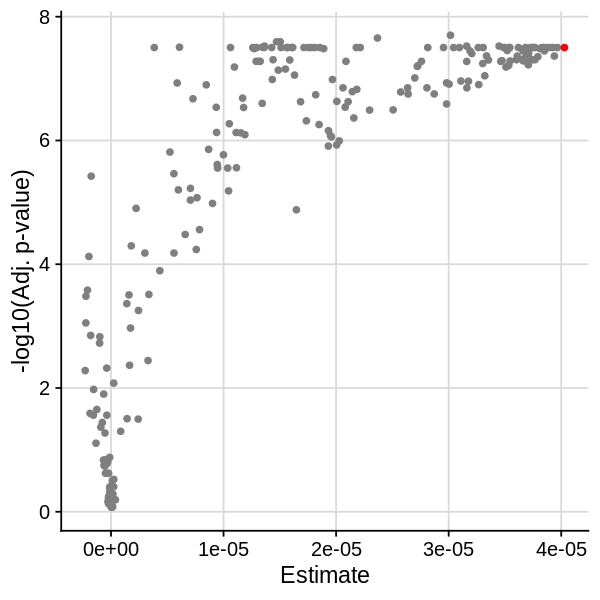

In [8]:
options(repr.plot.height=5, repr.plot.width=5)
gpt = ggplot(dat, aes(x=Estimate, y=NLogP)) + 
    geom_point(color=dat$color) + 
    labs(x = "Estimate", y="-log10(Adj. p-value)") +
    theme_cowplot() + 
    background_grid()
print(gpt)

In [9]:
lst_res = lapply(names(lst_dat), function(mtf){
    dat = lst_dat[[mtf]][["input20x"]]
    fit = dat$fit_log
    res = as.data.frame(summary(fit)$coefficients)
    
    b   = res['XXTFX_Dex', c("Estimate", "Pr(>|t|)")]
    b   = c(mtf, b)
    names(b) = c("Motif", "Estimate", "Pvalue")
    return(b)
})

dat = bind_rows(lst_res)
dat = dat %>% na.omit
dat = dat %>% 
    mutate(AdjPvalue = p.adjust(Pvalue, method = "BH")) %>%
    mutate(NLogP = -log10(AdjPvalue)) 
dat$color = ifelse(dat$Motif == "NR_20", "red", "gray50")
head(dat, 10)

Motif,Estimate,Pvalue,AdjPvalue,NLogP,color
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
AHR,0.6996122,6.746048e-05,9.413091e-05,4.0262678,gray50
AIRE,-0.2023542,7.462315e-01,7.621088e-01,0.1179830,gray50
AP1_1,1.4064454,5.035818e-10,3.069650e-08,7.5129111,gray50
AP1_2,1.8332428,6.093438e-09,1.558078e-07,6.8074109,gray50
BATF,2.1097106,1.569524e-08,1.915844e-07,6.7176400,gray50
BCL6_1,2.9525849,2.524295e-07,5.409203e-07,6.2668667,gray50
BCL6_2,2.1723108,4.403409e-07,8.256391e-07,6.0832097,gray50
CCAAT_CEBP,1.0302066,1.217266e-06,2.042964e-06,5.6897392,gray50
CENBP,2.1050469,2.432884e-08,1.915844e-07,6.7176400,gray50


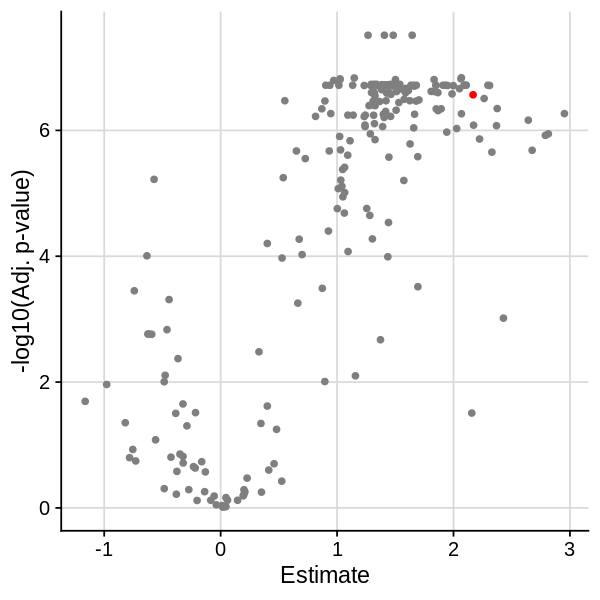

In [10]:
options(repr.plot.height=5, repr.plot.width=5)
gpt = ggplot(dat, aes(x=Estimate, y=NLogP)) + 
    geom_point(color=dat$color) + 
    labs(x = "Estimate", y="-log10(Adj. p-value)") +
    theme_cowplot() + 
    background_grid()
print(gpt)

In [36]:
fit = lst_dat[[1]]$fit
res = summary(fit)
names(res)

[1] "call"          "terms"         "residuals"     "coefficients" 
 [5] "aliased"       "sigma"         "df"            "r.squared"    
 [9] "adj.r.squared" "fstatistic"    "cov.unscaled"

In [37]:
lst_res = lapply(lst_dat, function(dat){
    fit  = dat$fit
    r2_1 = summary(fit)$r.squared
    
    fit = dat$fit_log
    r2_2 = summary(fit)$r.squared
    
    r2 = c(r2_1, r2_2)
    names(r2) = c("Norm", "LogNorm")
    return(r2)
})

dat = bind_rows(lst_res)
head(dat)

Norm,LogNorm
<dbl>,<dbl>
0.9909228,0.9999382
0.9572406,0.9990012
0.9953492,0.9999792
0.9953534,0.9999381
0.9922331,0.9999040
0.9813545,0.9997239


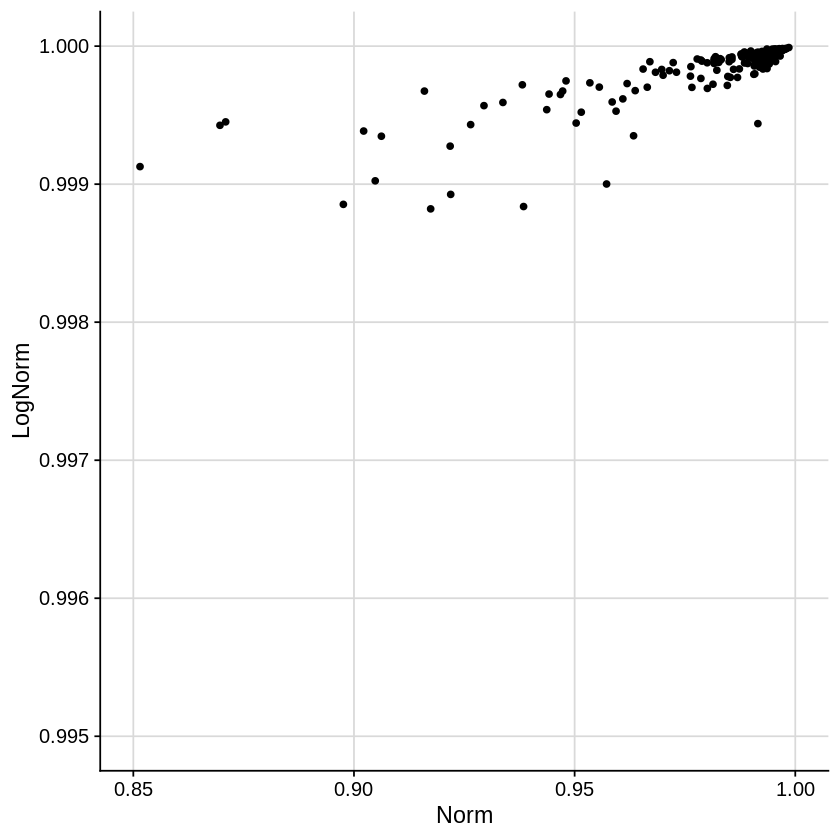

In [51]:
gpt = ggplot(dat, aes(x=Norm, y=LogNorm)) + 
    geom_point() + 
    xlim(0.85, 1) +
    ylim(0.995, 1) +
    #scale_x_log10() +
    #scale_y_log10() +
    theme_cowplot() + 
    background_grid()
print(gpt)

In [2]:
fdiry = file.path(FD_RES, "model_linear", "marginal_filter00_input20x", "target_PER1")
dir(fdiry)

[1] "AHR.RDS"           "AIRE.RDS"          "AP1_1.RDS"        
  [4] "AP1_2.RDS"         "BATF.RDS"          "BCL6_1.RDS"       
  [7] "BCL6_2.RDS"        "CCAAT_CEBP.RDS"    "CENBP.RDS"        
 [10] "CPEB1.RDS"         "CREB_ATF_1.RDS"    "CREB_ATF_2.RDS"   
 [13] "CREB_ATF_3.RDS"    "CREB3_XBP1.RDS"    "CTCF.RDS"         
 [16] "CUX_1.RDS"         "CUX_2.RDS"         "DDIT3+CEBPA.RDS"  
 [19] "E2F_1.RDS"         "E2F_2.RDS"         "E2F_3.RDS"        
 [22] "E2F_4.RDS"         "EBF1.RDS"          "Ebox_CACCTG.RDS"  
 [25] "Ebox_CACGTG_1.RDS" "Ebox_CACGTG_2.RDS" "Ebox_CAGATGG.RDS" 
 [28] "Ebox_CAGCTG.RDS"   "Ebox_CATATG.RDS"   "EGR.RDS"          
 [31] "ETS_1.RDS"         "ETS_2.RDS"         "EVI1_MECOM.RDS"   
 [34] "EWSR1_FLI1.RDS"    "FEZF1.RDS"         "FOX_1.RDS"        
 [37] "FOX_2.RDS"         "FOX_3.RDS"         "FOX_4.RDS"        
 [40] "FOX_5.RDS"         "FOX_7.RDS"         "FOX_9.RDS"        
 [43] "GATA.RDS"          "GC-tract.RDS"      "GCM.RDS"          
 [46] "GFI.RDS"           "GLI.RDS"           "GLIS.RDS"         
 [49] "GMEB2_1.RDS"       "GMEB2_2.RDS"       "GRHL.RDS"         
 [52] "HAND1.RDS"         "HD_10.RDS"         "HD_12.RDS"        
 [55] "HD_13.RDS"         "HD_14.RDS"         "HD_15.RDS"        
 [58] "HD_16.RDS"         "HD_18.RDS"         "HD_2.RDS"         
 [61] "HD_20.RDS"         "HD_21.RDS"         "HD_22.RDS"        
 [64] "HD_23.RDS"         "HD_25.RDS"         "HD_4.RDS"         
 [67] "HD_5.RDS"          "HD_7.RDS"          "HD_8.RDS"         
 [70] "HEN1.RDS"          "HIC_1.RDS"         "HIC_2.RDS"        
 [73] "HIF.RDS"           "HINFP1_1.RDS"      "HINFP1_2.RDS"     
 [76] "HINFP1_3.RDS"      "HLTF.RDS"          "HSF.RDS"          
 [79] "INSM1.RDS"         "IRF_1.RDS"         "IRF_2.RDS"        
 [82] "IRF_3.RDS"         "IRF_4.RDS"         "KLF_SP_1.RDS"     
 [85] "KLF_SP_2.RDS"      "KLF_SP_3.RDS"      "LEF1.RDS"         
 [88] "LIN54.RDS"         "MAF.RDS"           "MBD2.RDS"         
 [91] "MECP2.RDS"         "MEF2.RDS"          "MFZ1.RDS"         
 [94] "MIES.RDS"          "MTF1.RDS"          "MYB_1.RDS"        
 [97] "MYB_2.RDS"         "MYB_5.RDS"         "MZF1.RDS"         
[100] "NFAC_2.RDS"        "NFAT_1.RDS"        "NFAT_2.RDS"       
[103] "NFAT_4.RDS"        "NFI_1.RDS"         "NFI_2.RDS"        
[106] "NFI_3.RDS"         "NFKB_1.RDS"        "NFKB_2.RDS"       
[109] "NFKB_3.RDS"        "NFY.RDS"           "NR_1.RDS"         
[112] "NR_10.RDS"         "NR_11.RDS"         "NR_12.RDS"        
[115] "NR_13.RDS"         "NR_14.RDS"         "NR_15.RDS"        
[118] "NR_16.RDS"         "NR_17.RDS"         "NR_18.RDS"        
[121] "NR_19.RDS"         "NR_2.RDS"          "NR_20.RDS"        
[124] "NR_3.RDS"          "NR_4.RDS"          "NR_5.RDS"         
[127] "NR_7.RDS"          "NR_8.RDS"          "NR_9.RDS"         
[130] "NR2E3.RDS"         "NRF1.RDS"          "OCT4+SOX2.RDS"    
[133] "OSR2.RDS"          "OVOL1.RDS"         "P53-like_1.RDS"   
[136] "PAX_1.RDS"         "PAX_2.RDS"         "PAX-halfsite.RDS" 
[139] "PLAG1.RDS"         "POU_1.RDS"         "POU_2.RDS"        
[142] "POU_3.RDS"         "PRDM1.RDS"         "PRDM4.RDS"        
[145] "RBPJ.RDS"          "REL-halfsite.RDS"  "REST_NRSF.RDS"    
[148] "RFX_1.RDS"         "RFX_2.RDS"         "RFX_3.RDS"        
[151] "RUNX_1.RDS"        "RUNX_2.RDS"        "SCRT1.RDS"        
[154] "SIX_1.RDS"         "SIX_2.RDS"         "SMAD.RDS"         
[157] "SMARCA1.RDS"       "SMARCA5.RDS"       "SNAI2.RDS"        
[160] "SOX_1.RDS"         "SOX_2.RDS"         "SOX_3.RDS"        
[163] "SOX_4.RDS"         "SOX_5.RDS"         "SOX_6.RDS"        
[166] "SPDEF_1.RDS"       "SPDEF_2.RDS"       "SPI.RDS"          
[169] "SPZ1.RDS"          "SREBF1.RDS"        "SRF.RDS"          
[172] "STAT_1.RDS"        "STAT_2.RDS"        "TBX_1.RDS"        
[175] "TBX_2.RDS"         "TBX_3.RDS"         "TBX_4.RDS"        
[178] "TCF_LEF.RDS"       "TEAD.RDS"          "TFAP2_1.RDS"      
[181] "TFAP2_2.RDS"       "THAP1.RDS"     

In [3]:
fdiry = file.path(FD_RES, "model_linear", "marginal_filter95_input20x", "target_PER1")
dir(fdiry)

[1] "AP1_2.RDS"         "BCL6_2.RDS"        "CENBP.RDS"        
 [4] "CTCF.RDS"          "CUX_2.RDS"         "E2F_2.RDS"        
 [7] "EBF1.RDS"          "Ebox_CACCTG.RDS"   "Ebox_CACGTG_2.RDS"
[10] "Ebox_CAGATGG.RDS"  "ETS_2.RDS"         "EWSR1_FLI1.RDS"   
[13] "GC-tract.RDS"      "GLI.RDS"           "HD_12.RDS"        
[16] "HD_20.RDS"         "HEN1.RDS"          "INSM1.RDS"        
[19] "KLF_SP_1.RDS"      "KLF_SP_2.RDS"      "MBD2.RDS"         
[22] "MTF1.RDS"          "MZF1.RDS"          "NFI_3.RDS"        
[25] "NFKB_3.RDS"        "NFY.RDS"           "NR_11.RDS"        
[28] "NR_16.RDS"         "NR_18.RDS"         "NR_20.RDS"        
[31] "NR_3.RDS"          "NRF1.RDS"          "OSR2.RDS"         
[34] "PAX_2.RDS"         "PLAG1.RDS"         "PRDM1.RDS"        
[37] "RBPJ.RDS"          "REST_NRSF.RDS"     "RFX_1.RDS"        
[40] "RFX_3.RDS"         "SPI.RDS"           "SREBF1.RDS"       
[43] "TFAP2_1.RDS"       "YY1.RDS"           "ZBTB6.RDS"        
[46] "ZFN121.RDS"        "ZFX.RDS"           "ZIC_2.RDS"        
[49] "ZIC.RDS"           "ZNF134.RDS"        "ZNF257.RDS"       
[52] "ZNF28.RDS"         "ZNF320.RDS"        "ZNF324.RDS"       
[55] "ZNF331.RDS"        "ZNF332.RDS"        "ZNF335.RDS"       
[58] "ZNF354.RDS"        "ZNF524.RDS"        "ZNF554.RDS"       
[61] "ZNF586.RDS"        "ZNF667.RDS"        "ZNF708.RDS"       
[64] "ZNF768.RDS"        "ZSCAN3.RDS"

In [4]:
fdiry  = file.path(FD_RES, "model_linear", "marginal_filter00_input20x", "target_PER1")
fnames = dir(fdiry)
lst_res_per1_f00 = lapply(fnames, function(fname){
    fpath = file.path(fdiry, fname)
    lst = readRDS(fpath)
    return(lst)
})

In [5]:
fdiry  = file.path(FD_RES, "model_linear", "marginal_filter00_input20x_log", "target_PER1")
fnames = dir(fdiry)
lst_res_per1_f00_log = lapply(fnames, function(fname){
    fpath = file.path(fdiry, fname)
    lst = readRDS(fpath)
    return(lst)
})

In [12]:
lst = lst_res_per1_f00
lst = lapply(lst, function(tmp){
    fit = tmp$fit
    r2  = summary(fit)$r.squared
    return(r2)
})
val1 = unlist(lst)

lst = lst_res_per1_f00_log
lst = lapply(lst, function(tmp){
    fit = tmp$fit
    r2  = summary(fit)$r.squared
    return(r2)
})
val2 = unlist(lst)

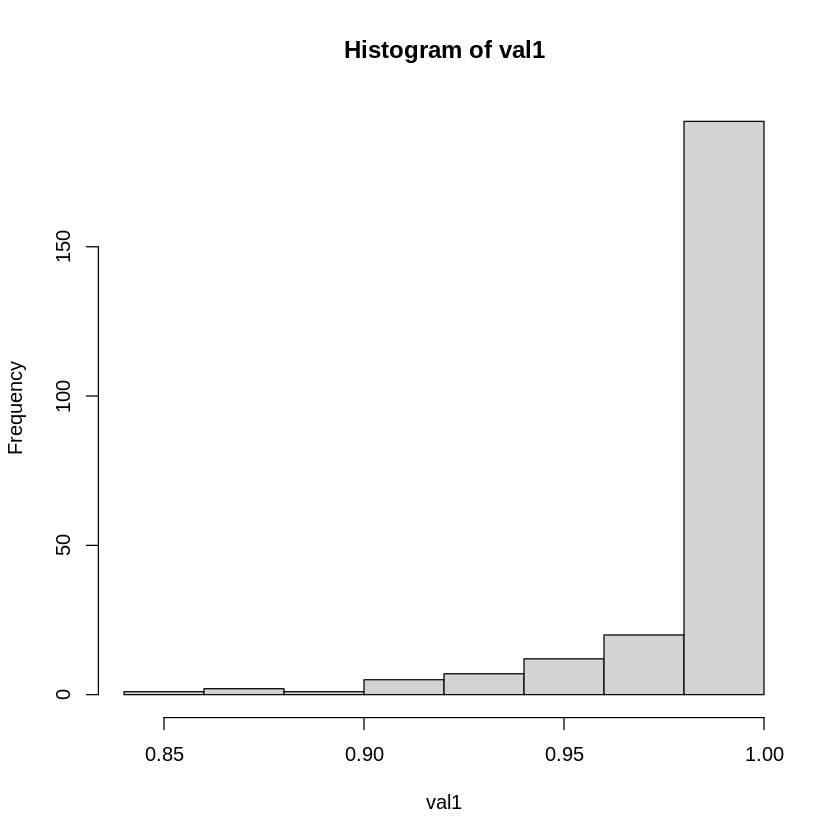

In [13]:
hist(val1)

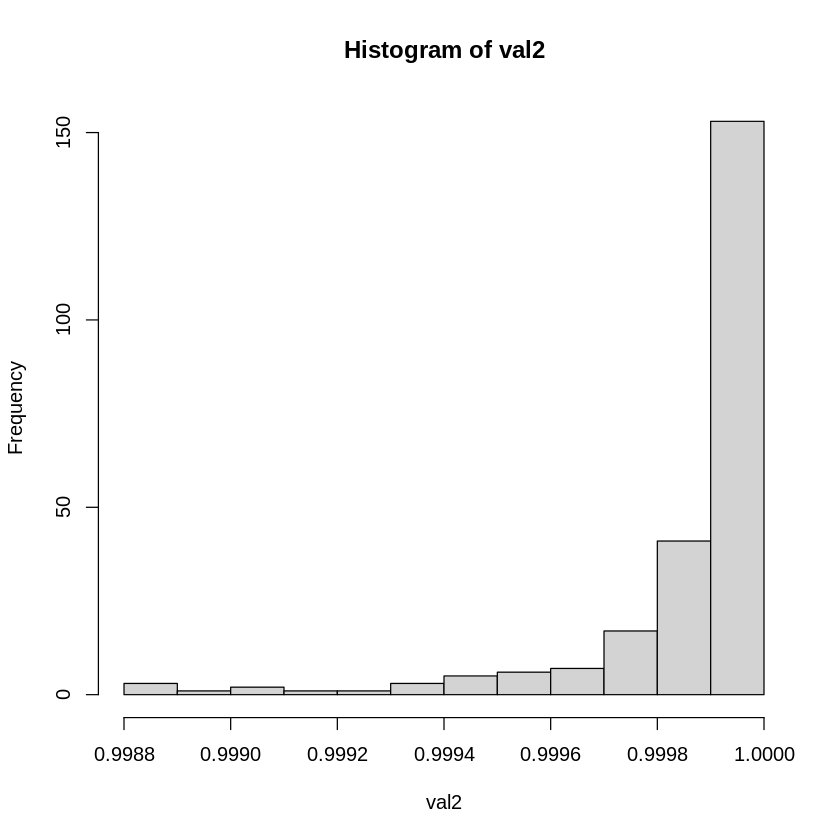

In [14]:
hist(val2)

In [10]:
dat = lst_res_per1_f00[[1]]$cnt
dat

Sample,Value,Size,Group,Norm_Value,Lognorm_Value,X
<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<fct>
Input1_20x,1304,371718546,Input,3.508031e-06,-5.454937,Input
Input2_20x,1265,347635732,Input,3.638866e-06,-5.439034,Input
Input3_20x,1252,349994051,Input,3.577204e-06,-5.446456,Input
Input4_20x,1402,413508358,Input,3.390500e-06,-5.469736,Input
Input5_20x,1225,341110487,Input,3.591212e-06,-5.444759,Input
TFX2_Dex,792,45413539,TFX_Dex,1.743973e-05,-4.758460,TFX_Dex
TFX2_DMSO,386,43844606,TFX_DMSO,8.803820e-06,-5.055329,TFX_DMSO
TFX3_Dex,409,26400671,TFX_Dex,1.549203e-05,-4.809892,TFX_Dex
TFX3_DMSO,322,26819569,TFX_DMSO,1.200616e-05,-4.920596,TFX_DMSO


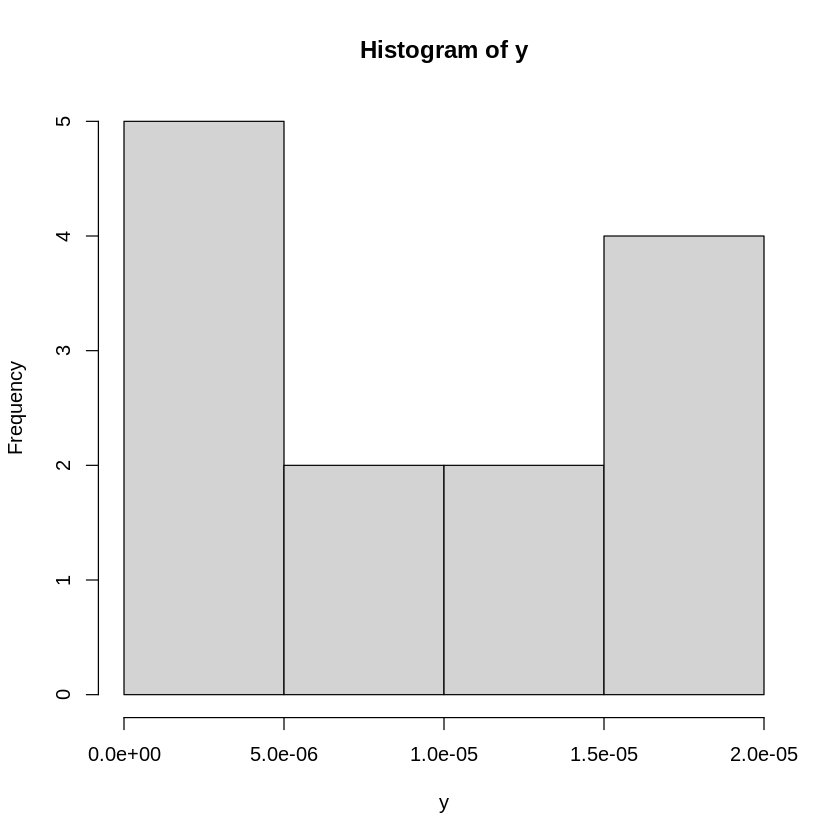

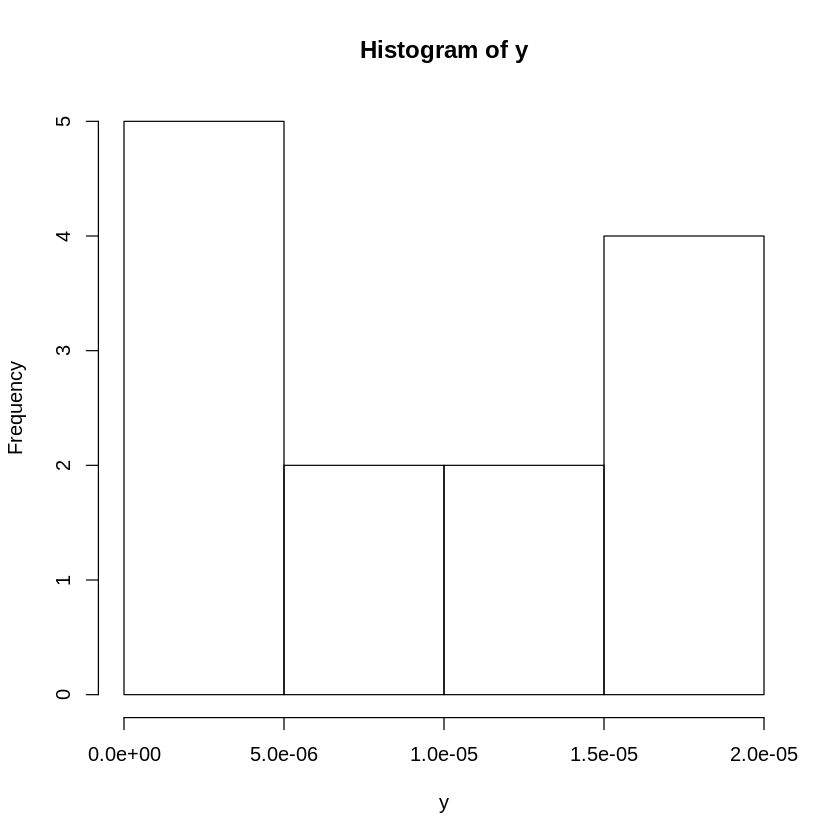

In [9]:
y = lst_res_per1_f00[[1]]$y
plot(hist(y))

In [22]:
fit = lst_res_per1_f00[[1]]$fit
print(fit)


Call:
lm(formula = y ~ X + 0)

Coefficients:
X(Intercept)    XXTFX_DMSO     XXTFX_Dex  
   3.541e-06     7.254e-06     6.594e-06  



In [23]:
summary(fit)$r.squared

[1] 0.9909228

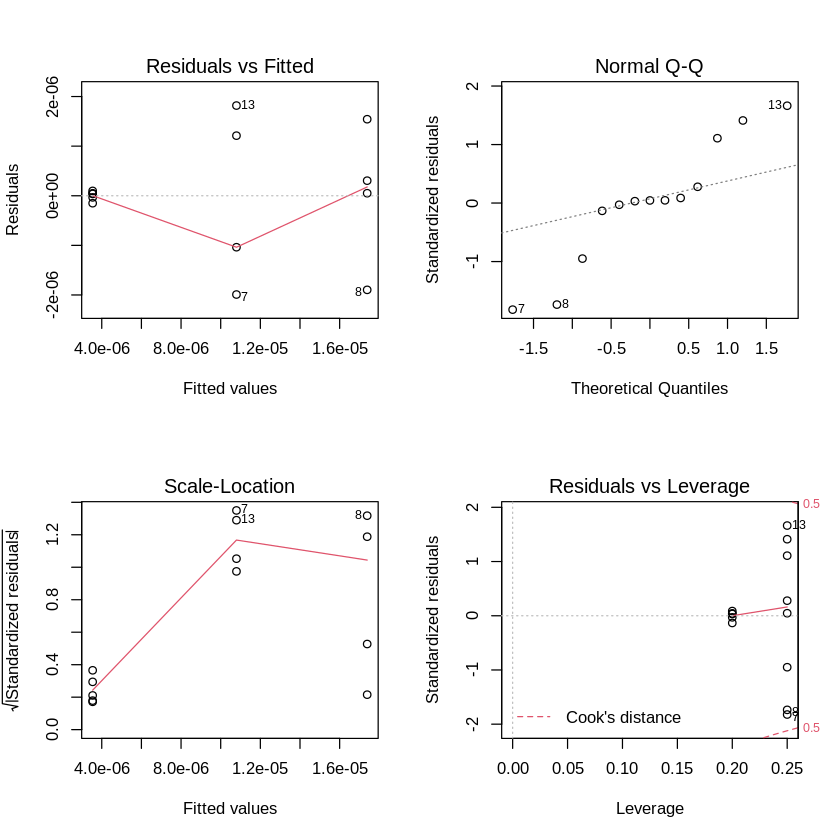

In [24]:
par(mfrow=c(2,2))
plot(fit)

In [19]:
fit = lst_res_per1_f00_log[[1]]$fit
print(fit)


Call:
lm(formula = y ~ X + 0)

Coefficients:
X(Intercept)    XXTFX_DMSO     XXTFX_Dex  
     -5.4510        0.4795        0.2106  



In [20]:
summary(fit)$r.squared

[1] 0.9999382

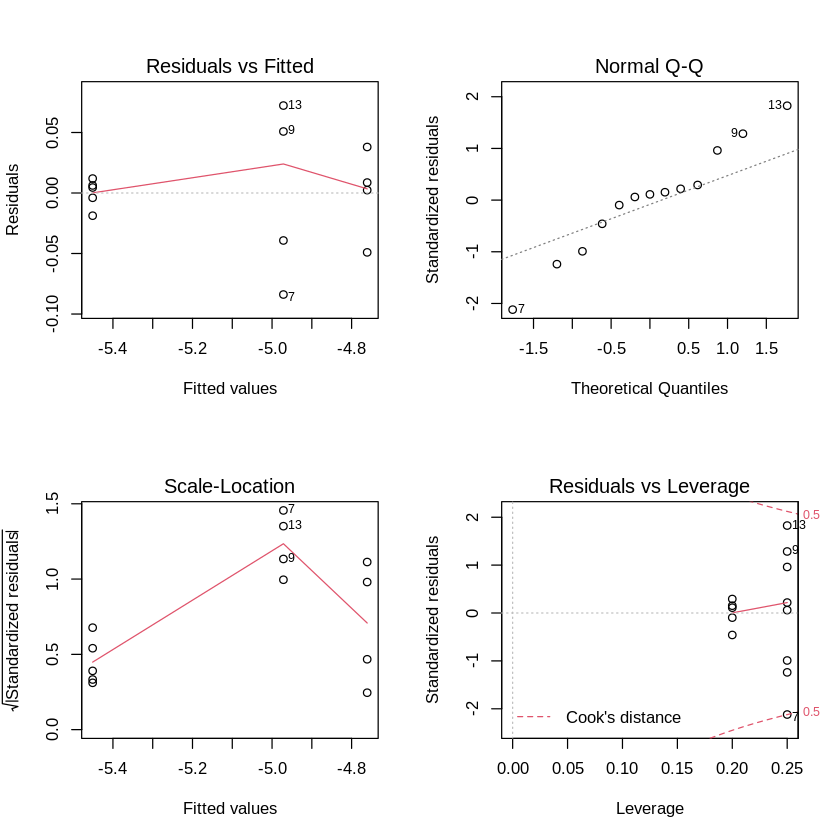

In [21]:
par(mfrow=c(2,2))
plot(fit)